In [1]:
#Dataset: https://www.kaggle.com/janiobachmann/bank-marketing-dataset/activity
#Dataset Link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('bank.csv')
print('Shape of the data = ',data.shape)
data.head()

Shape of the data =  (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.random.seed(37)
x = data['balance'].values
y_pdf = norm.pdf(x)
y_cdf = norm.cdf(x)

fig, ax = plt.subplots(figsize=(15, 6))

ax = [ax, ax.twinx()]

_ = ax[0].plot(x, y_pdf, label='pdf', color='r')
_ = ax[1].plot(x, y_cdf, label='cdf', color='b')

_ = ax[0].tick_params(axis='y', labelcolor='r')
_ = ax[1].tick_params(axis='y', labelcolor='b')

_ = ax[0].set_ylabel('pdf', color='r')
_ = ax[1].set_ylabel('cdf', color='b')

_ = ax[0].set_title('PDF and CDF of standard normal')

AttributeError: 'numpy.ndarray' object has no attribute 'sorted'

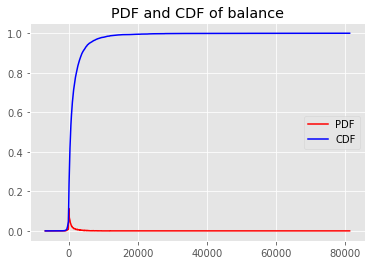

In [25]:
x=data['balance']
count, bins_count = np.histogram(x, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.title('PDF and CDF of balance')
plt.legend()

Observation:
Almost 100 percent of the datapoints lie under the balance range of 20000. So, it makes sence to delete the datapoints which
has balance of over 20000.

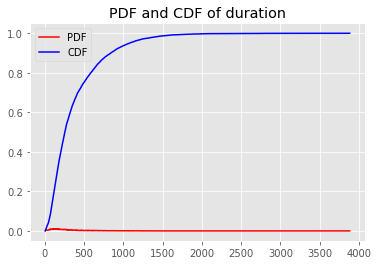

In [26]:
x1=data['duration']
count, bins_count = np.histogram(x1, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.title('PDF and CDF of duration')
plt.legend()

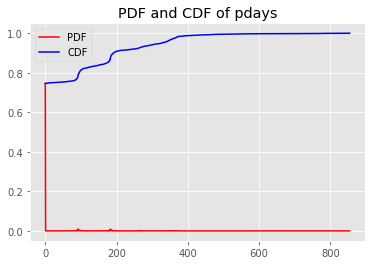

In [34]:
x2=data['pdays']
count, bins_count = np.histogram(x2, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.title('PDF and CDF of pdays')
plt.legend()

Observation:
Almost 100 percent of the datapoints lie under the pdays range of 400. So, it makes sence to delete/modify the datapoints which
has pdays of over 400.

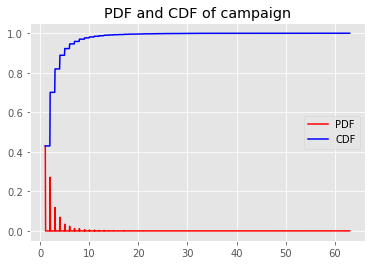

In [35]:
x3=data['campaign']
count, bins_count = np.histogram(x3, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.title('PDF and CDF of campaign')
plt.legend()

Observation:
Almost 100 percent of the datapoints lie under the campaign range of 10. So, it makes sence to delete/modify the datapoints which has campaign of over 10.

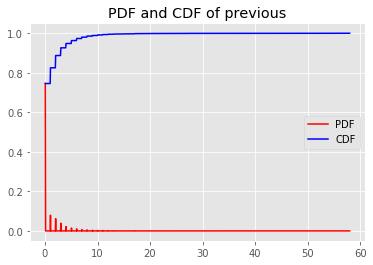

In [36]:
x4=data['previous']
count, bins_count = np.histogram(x4, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.title('PDF and CDF of previous')
plt.legend()

Observation:
Almost 100 percent of the datapoints lie under the previous range of 10. So, it makes sence to delete/modify the datapoints which has previous of over 10.

In [133]:
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
# data = data.drop(data[ (data.duration == 1042) | (data.duration == 1467)  ].index)
data = data.drop(data[ data.balance > 20000].index)
print('Shape of data after removing rows based on balance: ',data.shape)

Shape of data after removing rows based on balance:  (11105, 17)


In [134]:
data = data.drop(data[ data.duration > 1500].index)
print('Shape of data after removing rows based on duration: ',data.shape)

Shape of data after removing rows based on duration:  (10956, 17)


In [135]:
# data_test = data_test.drop(data_test[ (data_test.duration == 1042) | (data_test.duration == 1467)  ].index)
# indexNames = data_test[ (data_test.duration > 1042)].index & data_test[(data_test.duration < 1467)  ].index
# data_test.drop(indexNames , inplace=True)
data = data.drop(data[ data.pdays > 400].index)
print('Shape of data after removing rows based on pdays: ',data.shape)

Shape of data after removing rows based on pdays:  (10822, 17)


In [137]:
data = data.drop(data[ data.campaign > 10].index)
print('Shape of data after removing rows based on campaign: ',data.shape)

Shape of data after removing rows based on campaign:  (10614, 17)


In [138]:
data = data.drop(data[ data.previous > 10].index)
print('Shape of data after removing rows based on previous: ',data.shape)

Shape of data after removing rows based on previous:  (10523, 17)


## Label Encoding Categorical Features 

In [141]:
from sklearn.preprocessing import LabelEncoder
categorical_features=['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
for feature in categorical_features:
    encoder=LabelEncoder()
#     exec("%s = %d"%(labels_coulumn=encoder.fit_transform(data[feature])))
    labels_coulumn=encoder.fit_transform(data[feature])
    mappings = {index: label for index, label in 
                      enumerate(encoder.classes_)}
    print('%s_mappings: '%(feature),mappings)
    data[feature]=labels_coulumn
    print('-'*100)

job_mappings:  {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}
----------------------------------------------------------------------------------------------------
marital_mappings:  {0: 'divorced', 1: 'married', 2: 'single'}
----------------------------------------------------------------------------------------------------
education_mappings:  {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}
----------------------------------------------------------------------------------------------------
default_mappings:  {0: 'no', 1: 'yes'}
----------------------------------------------------------------------------------------------------
housing_mappings:  {0: 'no', 1: 'yes'}
----------------------------------------------------------------------------------------------------
loan_mappings:  {0: 'no', 1: 'yes'}
--------------------------

In [142]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,-6847,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,-3058,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,-2712,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,-2282,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,-2049,0,0,2,5,8,673,2,-1,0,3,1


In [143]:
# Before we go ahead and build any machine learning models from this data, let's split the data with 80:20.
y = data['deposit'].values
X = data.drop(['deposit'], axis=1)
X.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,-6847,1,0,2,5,8,1042,1,-1,0,3


In [144]:
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (10523, 16)
Shape of y:  (10523,)


## Splitting data into Train-Test  

In [145]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train:  (8418, 16)
Shape of X_test:  (2105, 16)
Shape of y_train (8418,)
Shape of y_test (2105,)


## Normalizing Numerical Features 

In [279]:
var_dict={}
from sklearn.preprocessing import Normalizer
Numerical_features=['age','balance','duration','campaign','pdays','previous']
# There are few ways to do it some of them have been listed in the loop.
for feature in Numerical_features:
    normalizer = Normalizer()
    normalizer.fit(X_train[feature].values.reshape(-1,1))


#     "X_train_%s_norm"%(feature)=normalizer.transform(X_train[feature].values.reshape(-1,1))
#     global exec('X_train_%s_norm'%(feature))
#     globals()["X_train_{feature}_norm"]=normalizer.transform(X_train[feature].values.reshape(-1,1))
#     global "X_train_{}_norm".format(feature)
#     global exec ('X_test_{feature}_norm')
    var_dict["X_train_{}_norm".format(feature)]= normalizer.transform(X_train[feature].values.reshape(-1,1))
#     X_test_pdays_norm = normalizer.transform(X_test[feature].values.reshape(-1,1))
#     globals()["X_test_{feature}_norm"]= normalizer.transform(X_test[feature].values.reshape(-1,1))
    var_dict["X_test_{}_norm".format(feature)]= normalizer.transform(X_test[feature].values.reshape(-1,1))
#     exec(f'X_train_{feature}_norm') = var_dict["X_train_{}_norm".format(feature)]
#     exec(f'X_test_{feature}_norm') = var_dict["X_test_{}_norm".format(feature)]
    print("After vectorizations")
#     print(X_train_pdays_norm.shape, y_train.shape)
    print("Shape of X_train_{}_norm".format(feature))
    print(var_dict["X_train_%s_norm"%(feature)].shape, y_train.shape)
#     print(X_test_pdays_norm.shape, y_test.shape)
    print("Shape of X_test_{}_norm".format(feature))
    print(var_dict["X_test_%s_norm"%(feature)].shape, y_test.shape)
    print("="*100)  
# X_train_balance_age.shape

After vectorizations
Shape of X_train_age_norm
(8418, 1) (8418,)
Shape of X_test_age_norm
(2105, 1) (2105,)
After vectorizations
Shape of X_train_balance_norm
(8418, 1) (8418,)
Shape of X_test_balance_norm
(2105, 1) (2105,)
After vectorizations
Shape of X_train_duration_norm
(8418, 1) (8418,)
Shape of X_test_duration_norm
(2105, 1) (2105,)
After vectorizations
Shape of X_train_campaign_norm
(8418, 1) (8418,)
Shape of X_test_campaign_norm
(2105, 1) (2105,)
After vectorizations
Shape of X_train_pdays_norm
(8418, 1) (8418,)
Shape of X_test_pdays_norm
(2105, 1) (2105,)
After vectorizations
Shape of X_train_previous_norm
(8418, 1) (8418,)
Shape of X_test_previous_norm
(2105, 1) (2105,)


In [280]:
# var_dict['X_train_previous_norm'].shape
X_train_age_norm = var_dict['X_train_age_norm']
X_test_age_norm = var_dict['X_test_age_norm']
X_train_balance_norm = var_dict['X_train_balance_norm']
X_test_balance_norm = var_dict['X_test_balance_norm']
X_train_duration_norm = var_dict['X_train_duration_norm']
X_test_duration_norm = var_dict['X_test_duration_norm']
X_train_campaign_norm = var_dict['X_train_campaign_norm']
X_test_campaign_norm = var_dict['X_test_campaign_norm']
X_train_pdays_norm = var_dict['X_train_pdays_norm']
X_test_pdays_norm = var_dict['X_test_pdays_norm']
X_train_previous_norm = var_dict['X_train_previous_norm']
X_test_previous_norm = var_dict['X_test_previous_norm']

In [281]:
print('Shape of X_train_previous_norm: ',X_train_previous_norm.shape)
print('X_test_previous_norm: ',X_test_previous_norm.shape)

Shape of X_train_previous_norm:  (8418, 1)
X_test_previous_norm:  (2105, 1)


In [285]:
# X_train_age= X_train['age'].values.reshape(-1,1)
# X_test_age= X_test['age'].values.reshape(-1,1)
# print('shape of X_train_age: ',X_train_age.shape)
# print('shape of X_test_age: ',X_test_age.shape)
# print("-"*100)
# X_train_job= X_train['job'].values.reshape(-1,1)
# X_test_job= X_test['job'].values.reshape(-1,1)
# print('shape of X_train_job: ',X_train_job.shape)
# print('shape of X_test_job: ',X_test_job.shape)
# print("-"*100)
# X_train_marital= X_train['marital'].values.reshape(-1,1)
# X_test_marital= X_test['marital'].values.reshape(-1,1)
# print('shape of X_train_marital: ',X_train_marital.shape)
# print('shape of X_test_marital: ',X_test_marital.shape)
# print("-"*100)
# X_train_education= X_train['education'].values.reshape(-1,1)
# X_test_education= X_test['education'].values.reshape(-1,1)
# print('shape of X_train_education: ',X_train_education.shape)
# print('shape of X_test_education: ',X_test_education.shape)
# print("-"*100)
# X_train_default= X_train['default'].values.reshape(-1,1)
# X_test_default= X_test['default'].values.reshape(-1,1)
# print('shape of X_train_default: ',X_train_default.shape)
# print('shape of X_test_default: ',X_test_default.shape)
# print("-"*100)
# X_train_housing= X_train['housing'].values.reshape(-1,1)
# X_test_housing= X_test['housing'].values.reshape(-1,1)
# print('shape of X_train_housing: ',X_train_housing.shape)
# print('shape of X_test_housing: ',X_test_housing.shape)
# print("-"*100)
# X_train_loan= X_train['loan'].values.reshape(-1,1)
# X_test_loan= X_test['default'].values.reshape(-1,1)
# print('shape of X_train_loan: ',X_train_loan.shape)
# print('shape of X_test_loan: ',X_test_loan.shape)
# print("-"*100)
# X_train_contact= X_train['contact'].values.reshape(-1,1)
# X_test_contact= X_test['contact'].values.reshape(-1,1)
# print('shape of X_train_contact: ',X_train_contact.shape)
# print('shape of X_test_contact: ',X_test_contact.shape)
# print("-"*100)
# X_train_contact= X_train['contact'].values.reshape(-1,1)
# X_test_contact= X_test['contact'].values.reshape(-1,1)
# print('shape of X_train_contact: ',X_train_contact.shape)
# print('shape of X_test_contact: ',X_test_contact.shape)
# print("-"*100)

var_dict1={}
label_features=['job','marital','education','default','housing','loan','contact','day','month','poutcome']
for feature in label_features:
    var_dict1["X_train_%s"%(feature)]= X_train[feature].values.reshape(-1,1)
    var_dict1["X_test_%s"%(feature)]= X_test[feature].values.reshape(-1,1)
    print('shape of X_train_{}: '.format(feature),(var_dict1["X_train_%s"%(feature)]).shape)
    print('shape of X_test_{}: '.format(feature),var_dict1["X_test_%s"%(feature)].shape)
    print("-"*100)

shape of X_train_job:  (8418, 1)
shape of X_test_job:  (2105, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_marital:  (8418, 1)
shape of X_test_marital:  (2105, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_education:  (8418, 1)
shape of X_test_education:  (2105, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_default:  (8418, 1)
shape of X_test_default:  (2105, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_housing:  (8418, 1)
shape of X_test_housing:  (2105, 1)
----------------------------------------------------------------------------------------------------
shape of X_train_loan:  (8418, 1)
shape of X_test_loan:  (2105, 1)
-------------------------------------------------------------------

In [287]:
X_train_job = var_dict1['X_train_job']
print('Shape of X_train_job',X_train_job.shape)
X_test_job = var_dict1['X_test_job']
print('Shape of X_test_job',X_test_job.shape)
X_train_marital = var_dict1['X_train_marital']
print('Shape of X_train_marital',X_train_marital.shape)
X_test_marital = var_dict1['X_test_marital']
print('Shape of X_test_marital',X_test_marital.shape)
X_train_education = var_dict1['X_train_education']
print('Shape of X_train_education',X_train_education.shape)
X_test_education = var_dict1['X_test_education']
print('Shape of X_test_education',X_test_education.shape)
X_train_default = var_dict1['X_train_default']
print('Shape of X_train_default',X_train_default.shape)
X_test_default = var_dict1['X_test_default']
print('Shape of X_test_default',X_test_default.shape)
X_train_housing = var_dict1['X_train_housing']
print('Shape of X_train_housing',X_train_housing.shape)
X_test_housing = var_dict1['X_test_housing']
print('Shape of X_test_housing',X_test_housing.shape)
X_train_loan = var_dict1['X_train_loan']
print('Shape of X_train_loan',X_train_loan.shape)
X_test_loan = var_dict1['X_test_loan']
print('Shape of X_test_loan',X_test_loan.shape)
X_train_contact = var_dict1['X_train_contact']
print('Shape of X_train_contact',X_train_contact.shape)
X_test_contact = var_dict1['X_test_contact']
print('Shape of X_test_contact',X_test_contact.shape)
X_train_day = var_dict1['X_train_day']
print('Shape of X_train_day',X_train_day.shape)
X_test_day = var_dict1['X_test_day']
print('Shape of X_test_day',X_test_day.shape)
X_train_month = var_dict1['X_train_month']
print('Shape of X_train_month',X_train_month.shape)
X_test_month = var_dict1['X_test_month']
print('Shape of X_test_month',X_test_month.shape)
X_train_poutcome = var_dict1['X_train_poutcome']
print('Shape of X_train_poutcome',X_train_poutcome.shape)
X_test_poutcome = var_dict1['X_test_poutcome']
print('Shape of X_test_poutcome',X_test_poutcome.shape)

Shape of X_train_job (8418, 1)
Shape of X_test_job (2105, 1)
Shape of X_train_marital (8418, 1)
Shape of X_test_marital (2105, 1)
Shape of X_train_education (8418, 1)
Shape of X_test_education (2105, 1)
Shape of X_train_default (8418, 1)
Shape of X_test_default (2105, 1)
Shape of X_train_housing (8418, 1)
Shape of X_test_housing (2105, 1)
Shape of X_train_loan (8418, 1)
Shape of X_test_loan (2105, 1)
Shape of X_train_contact (8418, 1)
Shape of X_test_contact (2105, 1)
Shape of X_train_day (8418, 1)
Shape of X_test_day (2105, 1)
Shape of X_train_month (8418, 1)
Shape of X_test_month (2105, 1)
Shape of X_train_poutcome (8418, 1)
Shape of X_test_poutcome (2105, 1)


In [294]:
X_train_job = X_train_job.reshape(-1,1)
X_test_job = X_test_job.reshape(-1,1)
X_train_marital = X_train_marital.reshape(-1,1)
X_test_marital = X_test_marital.reshape(-1,1)
X_train_education = X_train_education.reshape(-1,1)
X_test_education = X_test_education.reshape(-1,1)
X_train_default = X_train_default.reshape(-1,1)
X_test_default = X_test_default.reshape(-1,1)
X_train_housing = X_train_housing.reshape(-1,1)
X_test_housing = X_test_housing.reshape(-1,1)
X_train_loan = X_train_loan.reshape(-1,1)
X_test_loan = X_test_loan.reshape(-1,1)
X_train_contact = X_train_contact.reshape(-1,1)
X_test_contact = X_test_contact.reshape(-1,1)
X_train_day = X_train_day.reshape(-1,1)
X_test_day = X_test_day.reshape(-1,1)
X_train_month = X_train_month.reshape(-1,1)
X_train_poutcome = X_train_poutcome.reshape(-1,1)
X_test_poutcome = X_test_poutcome.reshape(-1,1)
X_train_age_norm = X_train_age_norm.reshape(-1,1)
X_test_age_norm = X_test_age_norm.reshape(-1,1)
X_train_balance_norm = X_train_balance_norm.reshape(-1,1)
X_test_balance_norm = X_test_balance_norm.reshape(-1,1)
X_train_duration_norm = X_train_duration_norm.reshape(-1,1)
X_test_duration_norm = X_test_duration_norm.reshape(-1,1)
X_train_campaign_norm = X_train_campaign_norm.reshape(-1,1)
X_test_campaign_norm = X_test_campaign_norm.reshape(-1,1)
X_train_pdays_norm = X_train_pdays_norm.reshape(-1,1)
X_test_pdays_norm = X_test_pdays_norm.reshape(-1,1)
X_train_previous_norm = X_train_previous_norm.reshape(-1,1)
X_test_previous_norm = X_test_previous_norm.reshape(-1,1)

In [300]:
X_train_job

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Concatenating label Encoded and normalized features 

In [303]:
# from scipy.sparse import hstack
from numpy import hstack
from scipy.sparse import csr_matrix
X_train = csr_matrix(hstack((X_train_age_norm, X_train_job, X_train_marital, X_train_education, X_train_default, X_train_balance_norm, X_train_housing, X_train_loan, X_train_contact, X_train_day, X_train_month, X_train_duration_norm, X_train_campaign_norm, X_train_pdays_norm, X_train_previous_norm,X_train_poutcome)))
X_test = csr_matrix(hstack((X_test_age_norm, X_test_job, X_test_marital, X_test_education, X_test_default, X_test_balance_norm, X_test_housing, X_test_loan, X_test_contact, X_test_day, X_test_month, X_test_duration_norm, X_test_campaign_norm, X_test_pdays_norm, X_test_previous_norm,X_test_poutcome)))

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

Final Data matrix
(8418, 16) (8418,)
(2105, 16) (2105,)


## Machine learning model for classification 

In [304]:
# let's create models through trying out multiple parameters and finding out the best model with the best parameters. 
# For this we will be using gridSearchCV technique.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {"C":np.logspace(-7,3,7),"penalty":['l1','l2']}
log_reg=LogisticRegression()
clf=GridSearchCV(log_reg, parameters, cv=10)
clf.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\moham\anaconda3\lib\site-packages\

tuned hpyerparameters :(best parameters)  {'C': 21.544346900318867, 'penalty': 'l2'}
accuracy : 0.7656221668017656


C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [305]:
from sklearn import metrics
clf=log_reg=LogisticRegression(C=21.544346900318867, penalty= 'l2', solver='lbfgs',max_iter= 500)
clf.fit(X_train,y_train)
print("score",clf.score(X_test,y_test))
print(metrics.classification_report(y_test, clf.predict(X_test)))

score 0.7724465558194774
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1119
           1       0.80      0.69      0.74       986

    accuracy                           0.77      2105
   macro avg       0.78      0.77      0.77      2105
weighted avg       0.78      0.77      0.77      2105



## Decision Tree Classifier 

In [306]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(class_weight ='balanced')
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(dt_clf, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf.fit(X_train,y_train)
train_score= clf.cv_results_['mean_train_score']
train_score= clf.cv_results_['std_train_score']
cv_score = clf.cv_results_['mean_test_score']
cv_score = clf.cv_results_['std_test_score']
bestDepth=clf.best_params_['max_depth']
bestScore=clf.best_score_
print("BEST DEPTH: ",clf.best_params_['max_depth'],"BEST MIN SAMPLE SPLITS: ",clf.best_params_['min_samples_split']," BEST SCORE: ",clf.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.658, test=0.658), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.657, test=0.667), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.658, test=0.662), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.656, test=0.675), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.659, test=0.652), total=   0.0s
[CV] max_depth=1, min_samples_split=5 ................................
[CV]  max_depth=1, min_samples_split=5, score=(train=0.659, test=0.654), tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=500, score=(train=0.657, test=0.667), total=   0.0s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, score=(train=0.658, test=0.662), total=   0.0s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, score=(train=0.656, test=0.675), total=   0.0s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, score=(train=0.659, test=0.652), total=   0.0s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, score=(train=0.659, test=0.654), total=   0.0s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500, score=(train=0.657, test=0.670), total=   0.0s
[CV] max_depth=1, min_samples_split=500 ..............................
[CV]  max_depth=1, min_samples_split=500

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    4.4s finished


In [308]:
print("score",clf.score(X_test,y_test))
print(metrics.classification_report(y_test, clf.predict(X_test)))

score 0.8199524940617577
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1119
           1       0.81      0.81      0.81       986

    accuracy                           0.82      2105
   macro avg       0.82      0.82      0.82      2105
weighted avg       0.82      0.82      0.82      2105



In [309]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=51)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf_rf = GridSearchCV(rf_clf, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf_rf.fit(X_train,y_train)
train_score= clf_rf.cv_results_['mean_train_score']
train_score= clf_rf.cv_results_['std_train_score']
cv_score = clf_rf.cv_results_['mean_test_score']
cv_score = clf_rf.cv_results_['std_test_score']
bestDepth=clf_rf.best_params_['max_depth']
bestScore=clf_rf.best_score_
print("BEST DEPTH: ",clf_rf.best_params_['max_depth'],"BEST min_samples_split: ",clf_rf.best_params_['min_samples_split']," BEST SCORE: ",clf_rf.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_split=5, score=(train=0.733, test=0.747), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.735, test=0.723), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.743, test=0.746), total=   0.3s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.744, test=0.747), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.737, test=0.714), total=   0.3s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.744, test=0.738), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.742, test=0.753), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.742, test=0.752), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.745, test=0.723), total=   0.2s
[CV] max_depth=1, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.736, test=0.741), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.733, test=0.747), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.735, test=0.723), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.743, test=0.746), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.744, test=0.747), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=(train=0.737, test=0.714), total=   0.2s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.6min finished


BEST DEPTH:  50 BEST min_samples_split:  10  BEST SCORE:  0.8259674180437834


In [310]:
print("score",clf_rf.score(X_test,y_test))
print(metrics.classification_report(y_test, clf_rf.predict(X_test)))

score 0.8266033254156769
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1119
           1       0.83      0.80      0.81       986

    accuracy                           0.83      2105
   macro avg       0.83      0.82      0.83      2105
weighted avg       0.83      0.83      0.83      2105



In [314]:
# https://www.geeksforgeeks.org/saving-a-machine-learning-model/
from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(clf_rf, 'rf_clf1.pkl')

# the following lines of code will load back and predict using the model
# # Load the model from the file
# clf_rf_from_joblib = joblib.load('rf_clf1.pkl')
 
# # Use the loaded model to make predictions
# clf_rf_from_joblib.predict(X_test)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['rf_clf1.pkl']

## XgBoost Classifier 

In [312]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf_xgb = GridSearchCV(xgb, parameters, cv= 10, scoring='accuracy', verbose=10,return_train_score=True)
clf_xgb.fit(X_train,y_train)
train_score= clf_xgb.cv_results_['mean_train_score']
train_score= clf_xgb.cv_results_['std_train_score']
cv_score = clf_xgb.cv_results_['mean_test_score']
cv_score = clf_xgb.cv_results_['std_test_score']
bestDepth=clf_xgb.best_params_['max_depth']
bestScore=clf_xgb.best_score_
print("BEST DEPTH: ",clf_xgb.best_params_['max_depth'],"BEST min_samples_split: ",clf_xgb.best_params_['min_samples_split']," BEST SCORE: ",clf_xgb.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\moham\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  max_depth=1, min_samples_split=5, score=(train=0.777, test=0.780), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.777, test=0.774), total=   1.0s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.779, test=0.759), total=   1.1s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.778, test=0.772), total=   1.3s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.778, test=0.768), total=   1.0s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.777, test=0.786), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.778, test=0.779), total=   1.0s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.778, test=0.778), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.777, test=0.768), total=   0.9s
[CV] max_depth=1, min_samples_split=5 ................................
[06:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_split=5, score=(train=0.775, test=0.798), total=   1.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[06:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  max_depth=1, min_samples_split=10, score=(train=0.777, test=0.780), total=   0.9s
[CV] max_depth=1, min_samples_split=10 ..

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 17.2min finished


BEST DEPTH:  5 BEST min_samples_split:  5  BEST SCORE:  0.8373740683102628


In [315]:
#
joblib.dump(clf_xgb, 'clf_xgb.pkl')

# the following lines of code will load back and predict using the model
# clf_xgb_from_joblib = joblib.load('clf_xgb.pkl')
# clf_xgb_from_joblib.predict(X_test)
print("score",clf_xgb.score(X_test,y_test))
print(metrics.classification_report(y_test, clf_xgb.predict(X_test)))

score 0.8427553444180522
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1119
           1       0.87      0.78      0.82       986

    accuracy                           0.84      2105
   macro avg       0.85      0.84      0.84      2105
weighted avg       0.85      0.84      0.84      2105



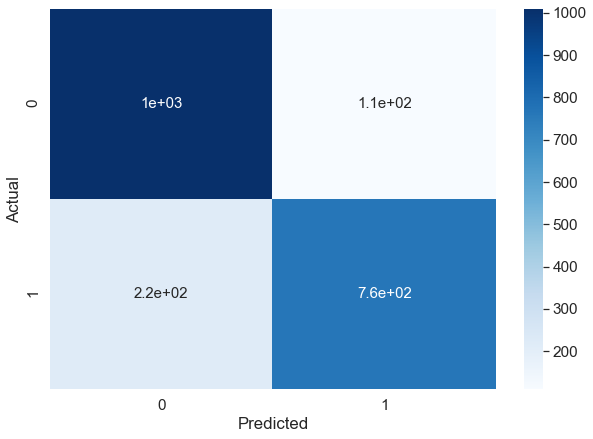

In [325]:
#Ref: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(y_test,  clf_xgb.predict(X_test))
df_con = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_con.index.name = 'Actual'
df_con.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_con, cmap="Blues", annot=True,annot_kws={"size": 15})# font size